<a href="https://colab.research.google.com/github/musah29/Teleco_Customer_Churn_Analysis/blob/main/LP3_TELCO_CHURN_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GROUP BEIJING**

**TELCOM CUSTOMER CHURN ANALYSIS**

In the highly competitive telecommunications industry, retaining customers is crucial for the success of any company. Customer churn, or the loss of customers to competitors or other reasons, can have a significant impact on a telecom company's revenue and profitability. Therefore, predicting and reducing customer churn is a top priority for many telecom companies. In this project, we aim to perform a churn analysis using four machine learning models to predict which customers are most likely to churn. By analyzing customer behavior, usage patterns, and other relevant factors, we can identify the key factors driving churn and develop targeted strategies to retain customers. The goal of this project is to provide valuable insights for telecom companies to reduce churn and improve customer retention rates.

**QUESTIONS**

-How many clients left the telecom company: In absolute and percentage terms?

-What is the total value of monthly bills/Revenue lost due to these departing clients?

-

**HYPOTHESIS**

Customers who have been with the company for a longer period are less likely to churn

**Null hypothesis:** There is no significant correlation between customer tenure and churn rates.

**Alternative hypothesis:** There is a significant negative correlation between customer tenure and churn rates, indicating that as customer tenure increases, churn rates decrease.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


IMPORTATIONS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
customer_list=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CHURN ANALYSIS/Telco-Customer-Churn.csv')

In [ ]:
customer_list.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
customer_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
customer_list.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
customer_list.size

147903

In [ ]:
#CONVERT churn,gender,phoneservice,paperlessbilling to numerical data types for visualisation

customer_list['Churn']=customer_list['Churn'].apply(lambda x:1 if x=='Yes' else 0)
customer_list['gender']=customer_list['gender'].apply(lambda x:1 if x=='Male' else 0)
customer_list['PhoneService']=customer_list['PhoneService'].apply(lambda x:1 if x=='Yes' else 0)
customer_list['PaperlessBilling']=customer_list['PaperlessBilling'].apply(lambda x:1 if x=='Yes' else 0)

#EXPLORATORY DATA ANALYSIS

---



VISUALIZING THE DATAFRAME

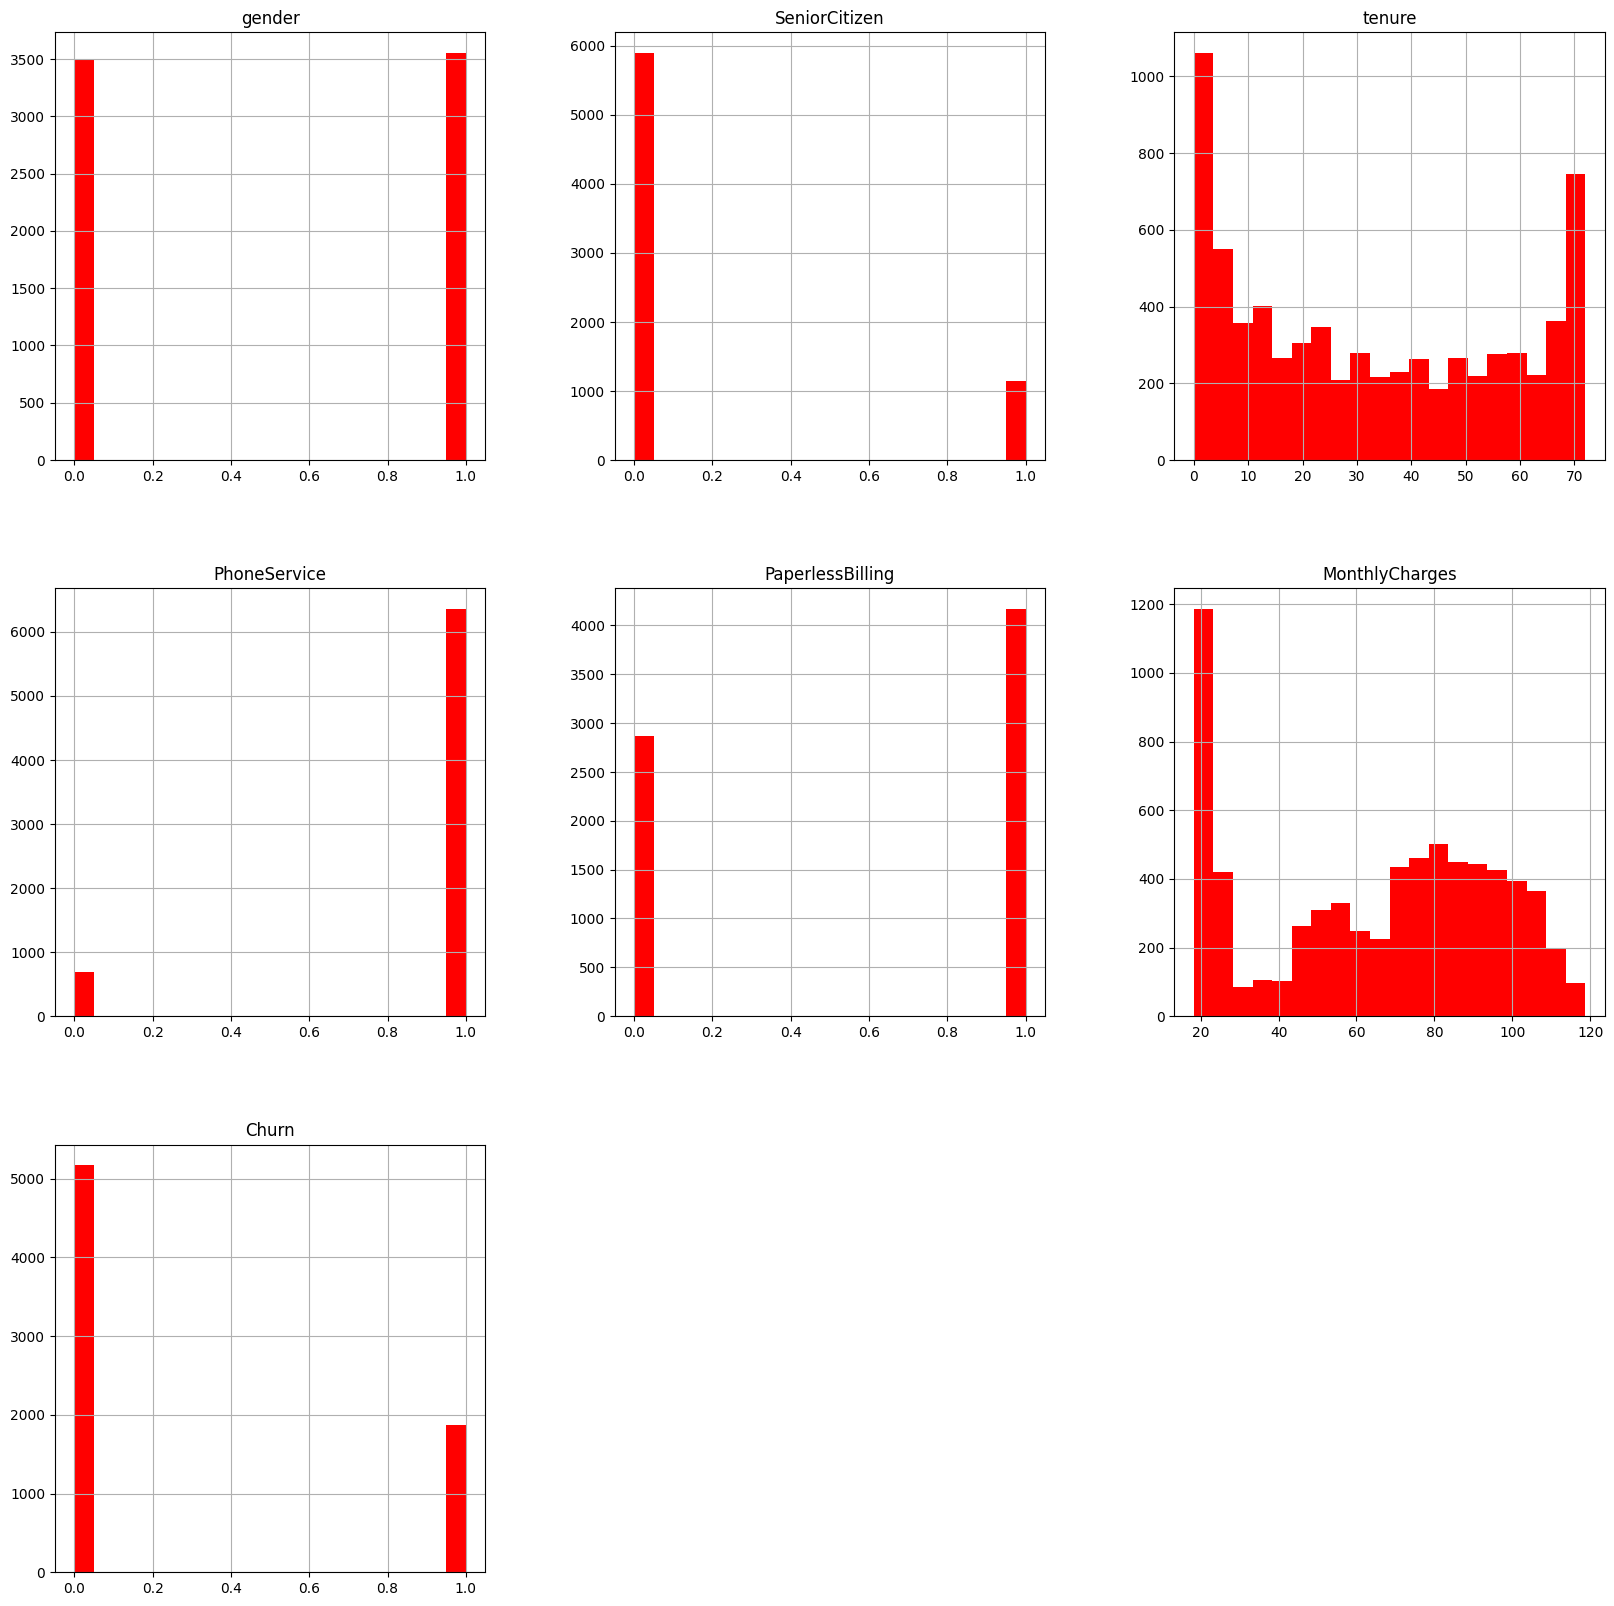

In [ ]:
customer_list.hist(bins=20, figsize=(20,20), color='r');
#employees.hist(bins=30, figsize=(20,20), color='r');

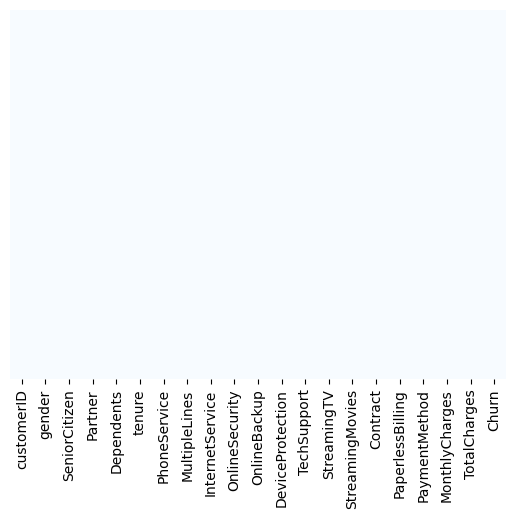

In [ ]:
#Check for missing data

sns.heatmap(customer_list.isnull(),yticklabels=False,cbar=False,cmap='Blues');

***THERE ARE NO MISSING VALUES IN THE ENTIRE DATASET***

In [ ]:
#Drop the customer ID column as it has not influence on whether customer will churn or not

customer_list.drop(['customerID'], axis=1, inplace=True)

In [ ]:
# Let's see how many customers left the company! 
churned_=customer_list[customer_list['Churn']==1]
stay_=customer_list[customer_list['Churn']==0]

  **Q1:How many clients left the telecom company: In absolute and percentage terms?**

In [ ]:
# Count the number of customers who stayed and left
# It seems that we are dealing with an imbalanced dataset 
print('Total= ', len(customer_list))
print('Number of customers who left= ', len(churned_))
print('% of customers who left= ', 1*len(churned_)/len(customer_list)*100, '%')

Total=  7043
Number of customers who left=  1869
% of customers who left=  26.536987079369588 %


**FIND THE TOTAL NUMBER OF CUSTOMERS WHO STAYED**

In [ ]:
print('Total= ', len(customer_list))
print('Number of customers who stayed= ', len(stay_))
print('% of customers who stayed= ', 1*len(stay_)/len(customer_list)*100, '%')

Total=  7043
Number of customers who stayed=  5174
% of customers who stayed=  73.4630129206304 %


**DETERMINE THE STRENGHT OF RELALTIONSHIP BETWEEN THE DIFFERENT ATTRIBUTES**



<ipython-input-15-5aa67c993021>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations=customer_list.corr()


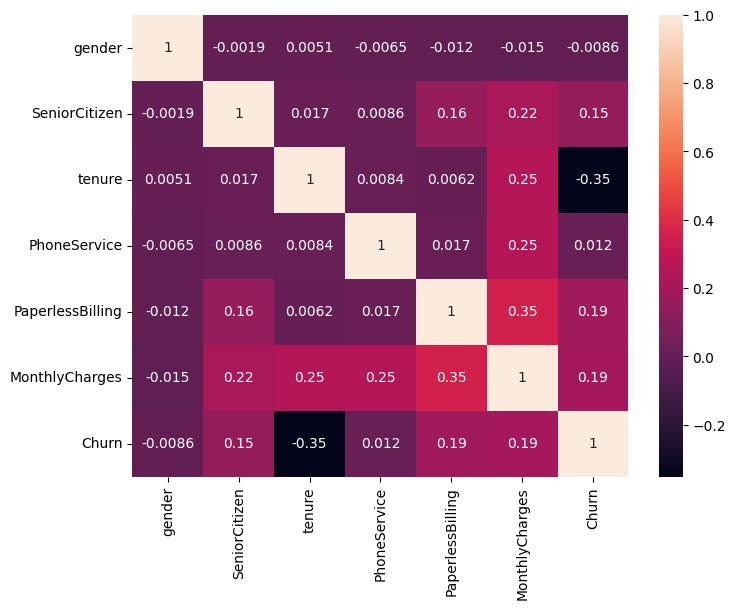

In [ ]:
correlations=customer_list.corr()
f,ax=plt.subplots(figsize=(8,6))
sns.heatmap(correlations,annot=True);

**VISUALIZE THE GENDER COLUMN AND CHURN**

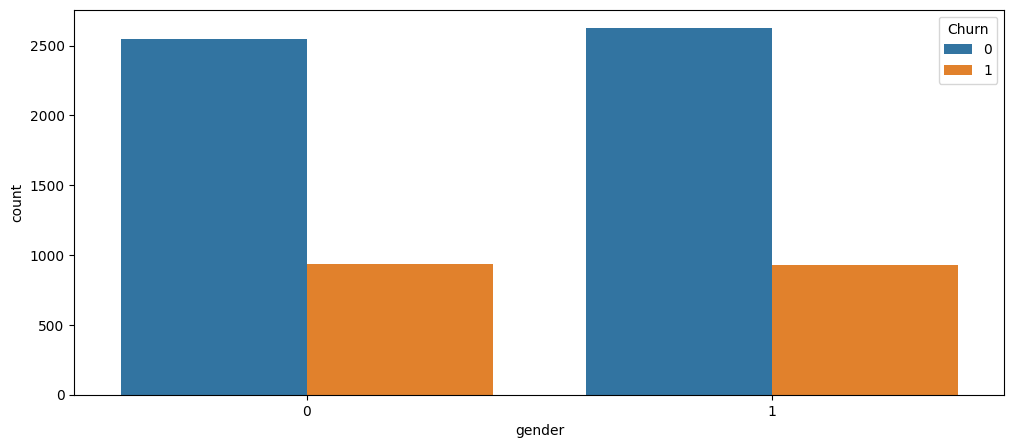

In [ ]:
plt.figure(figsize=[12,5])
sns.countplot(x='gender',hue='Churn',data=customer_list);

**OBSERVATION**

There is almost an equal number of males and females who left the telecom company.The number of males and female customers who stayed with the company are almost also the same.

**CHURN AMONG SENIOR CITIZENS**

<Axes: xlabel='SeniorCitizen', ylabel='count'>

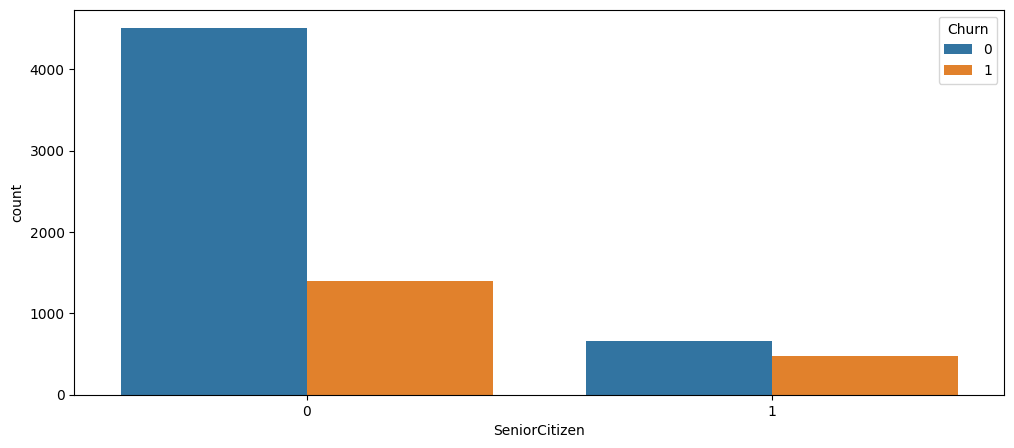

In [ ]:
plt.figure(figsize=[12,5])
plt.subplot(111)
sns.countplot(x='SeniorCitizen',hue='Churn',data=customer_list)

**OBSERVATION**

Senior citizens are less likely to churn compared to younger customers. Though the number of senior citizens who stayed is slightly higher than those who churned.

<Axes: xlabel='PhoneService', ylabel='count'>

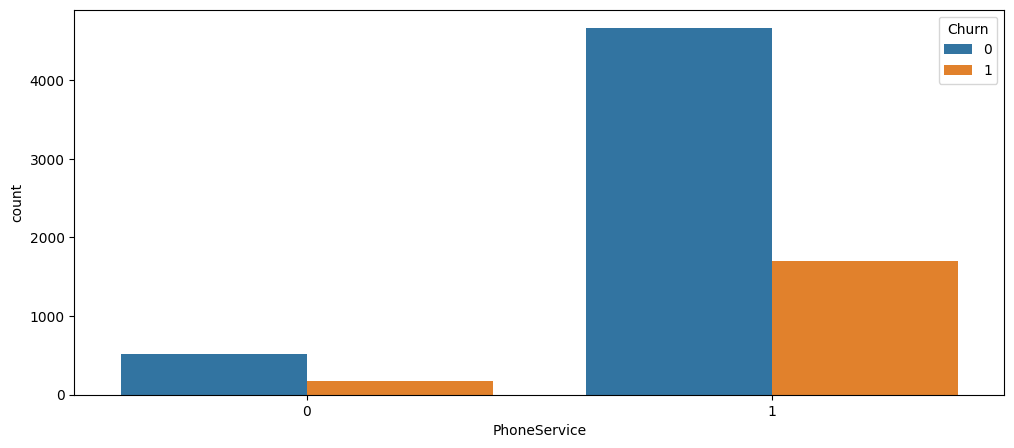

In [ ]:
plt.figure(figsize=[12,5])
plt.subplot(111)
sns.countplot(x='PhoneService',hue='Churn',data=customer_list)

<Axes: xlabel='MultipleLines', ylabel='count'>

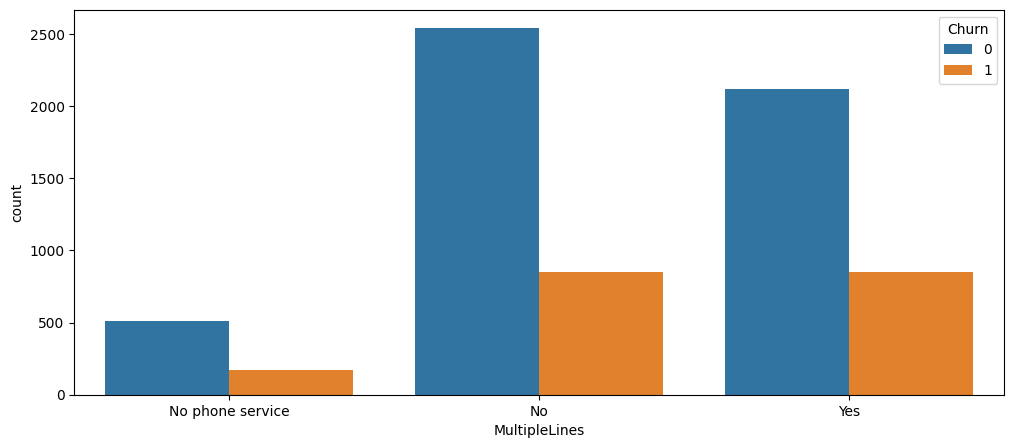

In [ ]:
plt.figure(figsize=[12,5])
plt.subplot(111)
sns.countplot(x='MultipleLines',hue='Churn',data=customer_list)

**CUSTOMER TENURE VRS CHURN**

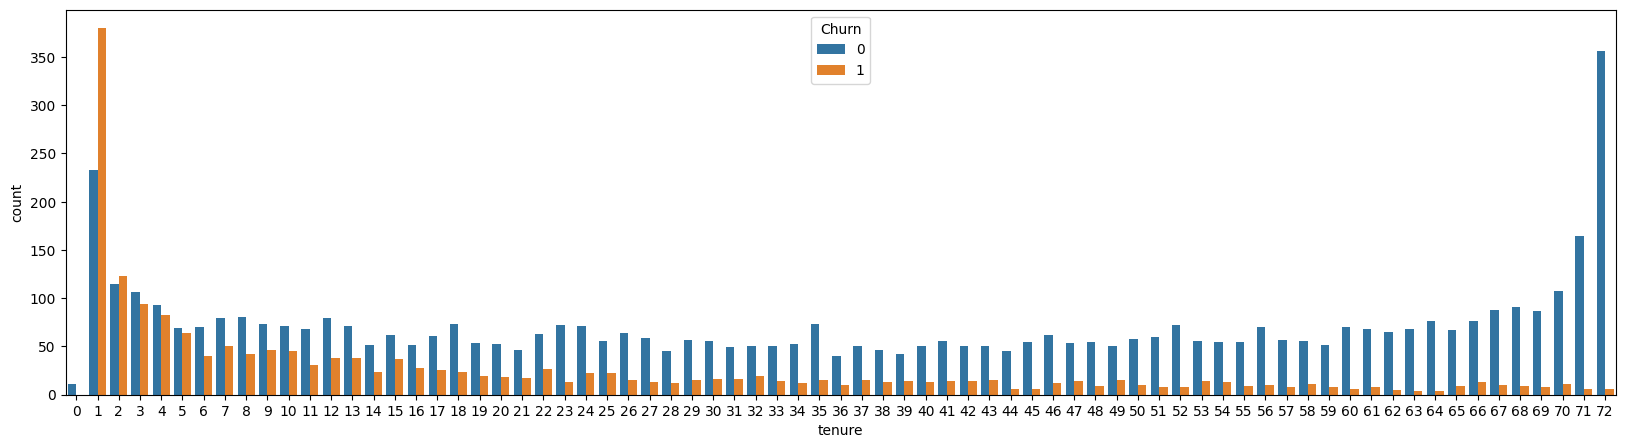

In [ ]:
plt.figure(figsize=[20,5])
plt.subplot(111)
sns.countplot(x='tenure',hue='Churn',data=customer_list);

**OBSERVATION**

There is a negative relationship between tenure and churn. The longer a customer stays with the telecom company, the less likely they are to leave.

**CREATE TESTING AND TRAINING DATASET** 

In [ ]:
x_cat=customer_list[['Partner','Dependents','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','TotalCharges']]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder=OneHotEncoder()
x_cat=onehotencoder.fit_transform(x_cat).toarray()

In [ ]:
x_cat=pd.DataFrame(x_cat)

In [ ]:
x_numerical=customer_list[['gender','SeniorCitizen','tenure','PhoneService']]

In [ ]:
x_all=pd.concat([x_cat,x_numerical], axis=1)

In [ ]:
#Apply Min Max scaler
from sklearn.preprocessing import MinMaxScaler
x_all.columns = x_all.columns.astype(str)
Scaler=MinMaxScaler()
x=Scaler.fit_transform(x_all)

In [ ]:
y=customer_list['Churn']

**MODEL 1: TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print('Accuracy {} %'.format(100*accuracy_score(y_pred,y_test)))

Accuracy 80.465644520159 %


<Axes: >

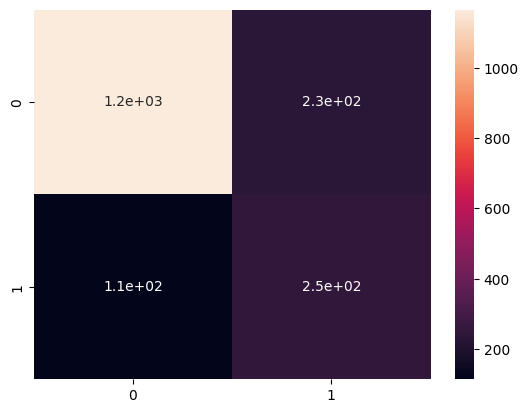

In [ ]:
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1279
           1       0.69      0.52      0.59       482

    accuracy                           0.80      1761
   macro avg       0.76      0.72      0.73      1761
weighted avg       0.79      0.80      0.80      1761



**MODEL 2: TRAIN AND EVALUATE A RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier 

In [ ]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=model.predict(x_test)

<Axes: >

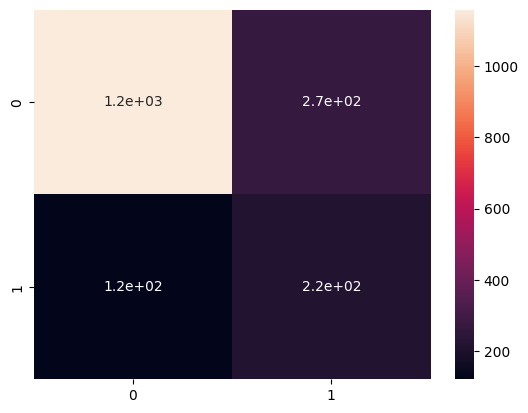

In [ ]:
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True)

***CLASSIFICATION REPORT***

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1279
           1       0.64      0.45      0.53       482

    accuracy                           0.78      1761
   macro avg       0.73      0.68      0.69      1761
weighted avg       0.77      0.78      0.77      1761



**MODEL 3: TRAIN AND EVALUATE A AFTICIAL NEURAL NETWORK MODEL**

In [ ]:
import tensorflow as tf
 

model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=500, activation='relu',input_shape=(6572,)))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               3286500   
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 1)                 501       
                                                                 
Total params: 3,788,001
Trainable params: 3,788,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
epochs_hist=model.fit(x_train,y_train, epochs=100,batch_size=50)

Epoch 1/100
106/106 [==============================] - 8s 61ms/step - loss: 0.4434 - accuracy: 0.7864
Epoch 2/100
106/106 [==============================] - 6s 53ms/step - loss: 0.3651 - accuracy: 0.8334
Epoch 3/100
106/106 [==============================] - 7s 69ms/step - loss: 0.1342 - accuracy: 0.9542
Epoch 4/100
106/106 [==============================] - 6s 54ms/step - loss: 0.0583 - accuracy: 0.9792
Epoch 5/100
106/106 [==============================] - 7s 68ms/step - loss: 0.0326 - accuracy: 0.9858
Epoch 6/100
106/106 [==============================] - 6s 54ms/step - loss: 0.0298 - accuracy: 0.9890
Epoch 7/100
106/106 [==============================] - 7s 68ms/step - loss: 0.0235 - accuracy: 0.9898
Epoch 8/100
106/106 [==============================] - 6s 53ms/step - loss: 0.0219 - accuracy: 0.9911
Epoch 9/100
106/106 [==============================] - 7s 66ms/step - loss: 0.0201 - accuracy: 0.9915
Epoch 10/100
106/106 [==============================] - 6s 56ms/step - loss: 0.038

In [ ]:
y_pred=model.predict(x_test)
y_pred=(y_pred>0.5)

56/56 [==============================] - 1s 9ms/step


**VISUALISING THE LOSS PROGRESS OF THE MODEL**

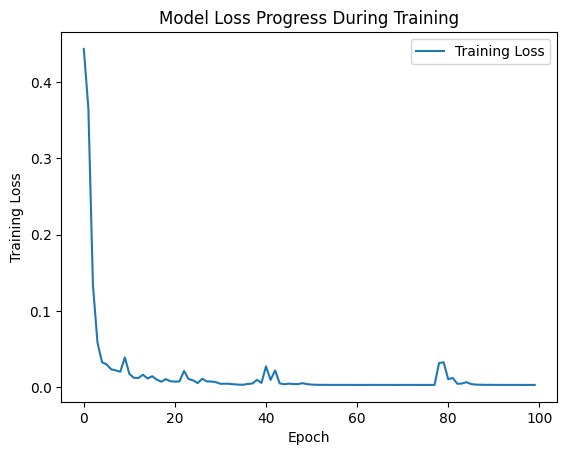

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

**VISUALISING THE ACCURACY PROGRESS OF THE MODEL**

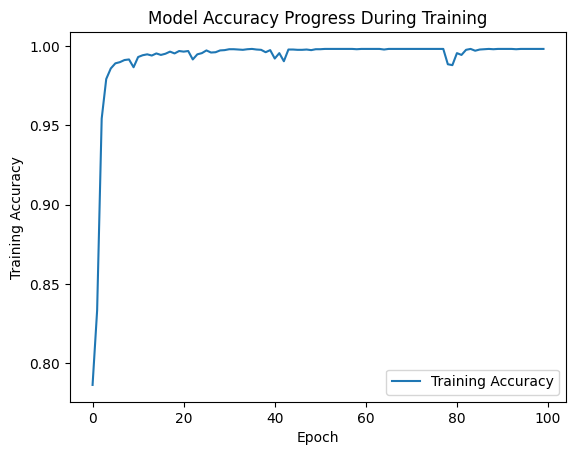

In [ ]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy'])

<Axes: >

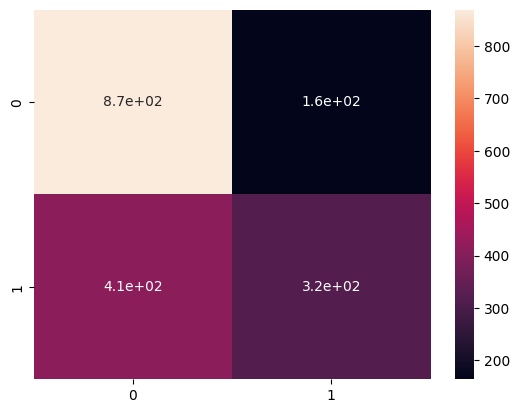

In [ ]:
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True)

***CLASSIFICATION REPORT***

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.68      0.75      1279
           1       0.44      0.66      0.53       482

    accuracy                           0.67      1761
   macro avg       0.64      0.67      0.64      1761
weighted avg       0.73      0.67      0.69      1761



**MODEL 4: TRAIN AND EVALUATE A DECISION TREE CLASSIFIER**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Build the decision tree model
clf = DecisionTreeClassifier()

clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
from sklearn import tree
 #Visualize the decision tree
#tree.plot_tree(clf);

<Axes: >

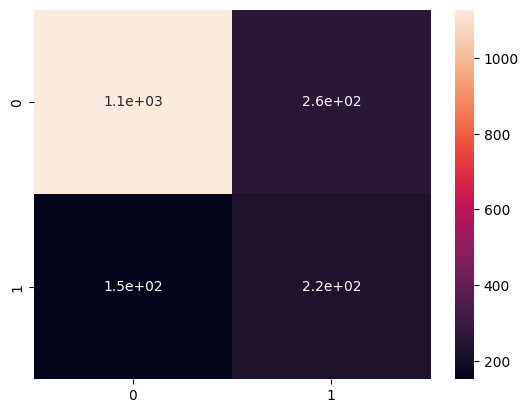

In [ ]:
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True)

***CLASSIFICATION REPORT***

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      1279
           1       0.60      0.46      0.52       482

    accuracy                           0.77      1761
   macro avg       0.71      0.67      0.68      1761
weighted avg       0.75      0.77      0.76      1761



**FIRST LEVEL MODEL COMPARISM**

In [ ]:
import pandas as pd

# Define the model names
model_names = ['Logistic Regression', 'Random Forest', 'Artificial Neural Network', 'Decision Tree']

# Define the performance metrics for comparison
performance_metrics = ['Accuracy', 'Precision (Class 0)', 'Precision (Class 1)',
                       'Recall (Class 0)', 'Recall (Class 1)',
                       'F1 Score (Class 0)', 'F1 Score (Class 1)']

# Create a list of lists to store the metric values for each model
model_metrics = [
    [0.70, 0.84, 0.61, 0.88, 0.54, 0.86, 0.58],  # Metrics for Logistic Regression
    [0.78, 0.83, 0.61, 0.89, 0.48, 0.86, 0.54],  # Metrics for Random Forest
    [0.68, 0.84, 0.43, 0.7, 0.64, 0.76, 0.51],  # Metrics for Artificial Neural Network
    [0.77, 0.84, 0.57, 0.85, 0.55, 0.85, 0.56],  # Metrics for Decision Tree
]

# Create an empty dataframe
df = pd.DataFrame(model_metrics, columns=performance_metrics, index=model_names)

# Display the dataframe
print(df)


                           Accuracy  Precision (Class 0)  Precision (Class 1)  \
Logistic Regression            0.70                 0.84                 0.61   
Random Forest                  0.78                 0.83                 0.61   
Artificial Neural Network      0.68                 0.84                 0.43   
Decision Tree                  0.77                 0.84                 0.57   

                           Recall (Class 0)  Recall (Class 1)  \
Logistic Regression                    0.88              0.54   
Random Forest                          0.89              0.48   
Artificial Neural Network              0.70              0.64   
Decision Tree                          0.85              0.55   

                           F1 Score (Class 0)  F1 Score (Class 1)  
Logistic Regression                      0.86                0.58  
Random Forest                            0.86                0.54  
Artificial Neural Network                0.76                0.5

**HYPERPARAMETER TUNING**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid_lr = {'penalty': ['l1', 'l2'],
                 'C': [0.1, 1, 10]}

param_grid_rf = {'n_estimators': [100, 200, 300],
                 'max_depth': [None, 5, 10],
                 'min_samples_split': [2, 5, 10]}

param_grid_ann = {'hidden_layer_sizes': [(50,), (100,), (200,)],
                  'activation': ['relu', 'tanh'],
                  'solver': ['adam', 'sgd']}

param_grid_dt = {'criterion': ['gini', 'entropy'],
                 'max_depth': [None, 5, 10],
                 'min_samples_split': [2, 5, 10]}


In [ ]:
from sklearn.neural_network import MLPClassifier  # Import MLPClassifier
models = {'Logistic Regression': (LogisticRegression(), param_grid_lr),
          'Random Forest': (RandomForestClassifier(), param_grid_rf),
          'Artificial Neural Network': (MLPClassifier(), param_grid_ann),
          'Decision Tree': (DecisionTreeClassifier(), param_grid_dt)}


In [ ]:
results = {}

for model_name, (model, param_grid) in models.items():
    print(f"Tuning {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
    grid_search.fit(x_train, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    y_pred = best_model.predict(x_test)
    report = classification_report(y_test, y_pred)
    results[model_name] = {'best_model': best_model, 'best_params': best_params, 'classification_report': report}


Tuning Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Tuning Random Forest...
Tuning Artificial Neural Network...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [ ]:
best_model = None
best_score = 0

for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Classification Report:\n{result['classification_report']}\n")
    
    # You can choose the performance metric to determine the best model
    accuracy = result['best_model'].score(X_test, y_test)
    
    if accuracy > best_score:
        best_model = result['best_model']
        best_score = accuracy

print(f"Best Model: {best_model}")
